In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [455]:
def y_lower_boundry(matrix, om, omg, k, dx, dy, i, j):
    """This is a function for the lower boundary for y"""
    
    return (2/3)*(2*matrix[i-1, j] -  0.5*matrix[i-2, j])

def x_left_boundary(matrix, om, omg, k, dx, dy, i, j):
    """This is a function for the left boundary of x"""

    return (1/((3/2) + 1j*k*dx))*(2*matrix[i, j+1] - 0.5*matrix[i, j+2])
    
def x_right_boundary(matrix, om, omg, k, dx, dy, i, j):
    """This is a function for the right boundary of x"""

    return (1/((3/2) + 1j*k*dx))*(2*matrix[i, j-1] - 0.5*matrix[i, j-2])

def Laplace(matrix, om, omg, k, dx, dy, i, j):
    """Central Difference for laplaces equation"""

    return ((dy**2)*(matrix[i, j+1] + matrix[i, j-1]) + (dx**2)*(matrix[i+1, j] + matrix[i-1, j]))*(1/(2*(dx**2) + 2*(dy**2)))


def y_upper_boundary(matrix, om, omg, k, dx, dy, i, j,x):
    """The upper y boundary function"""
    return (2*matrix[i+1, j] - 0.5*matrix[i+2, j])*(1/( 1.5+omg*dy))

def y_raft_boundary(matrix,om,omg, k, dx, dy, i, j, intmiddle, pitch, heav, x):
    """The upper y raft boundary function"""
    return (  2*matrix[i+1, j] - 0.5*matrix[i+2, j] - dy*om*1j*(heav + pitch*(x[j] - x[intmiddle])))*(2/3)

In [468]:
N = 200
M = 50
L = 3
g = 9.81
k = 3
h = 1
g = 9.81
x = np.linspace(-L, L, N)
y = np.linspace(0, h, M)
dx = np.abs(x[0] - x[-1])/len(x)
dy = -np.abs(y[0] - y[-1])/len(y)
X, Y = np.meshgrid(x, y)
middle = int(N/2)
change = 20
delta = int(middle - change)
delta2 = int(middle + change)
pitch = 0.1
heav = 0
om = np.sqrt(k*g*np.tanh(k*h))
omg = (om**2)/9.8
#initialising P
P = (np.ones((M,N), dtype=complex)*np.sin(X) + 1j*np.ones((M,N), dtype=complex)*np.sin(X))

B =  np.ones((M,N), dtype=complex)*np.sin(X) + 1j*np.ones((M,N), dtype=complex)*np.sin(X)

P1 = (np.ones((M,N), dtype=complex) + 1j*np.ones((M,N), dtype=complex))
B1 = np.ones((M,N), dtype=complex) + 1j*np.ones((M,N), dtype=complex)
(1/( 1.5-omg*dy))

U = 0.01
dy
(dy**2)*(1/(2*(dx**2) + 2*(dy**2)))

(1/( 1.5+omg*dy))

0.6943307511306294

In [469]:
dy

-0.02

In [470]:
convergence = []
conv_im = []
conv_re = []
convergence = []
conv_im1 = []
conv_re1 = []

In [471]:
iterations = 1000000
tolerance = 0.000001  # the tolerance

dt = 0.01

for t in range(iterations):
    
    #writing loop below:
    for i in range(0, M):
        for j in range(0, N):
            

            #y boundaries upper
            if i == 0:
                if j in range(delta, delta2+1):
                    a = i
                    b = j
                    P[i, j] = y_raft_boundary(P, om, omg, k, dx, dy, a, b, middle, pitch, heav, x)
                    P1[i, j] = y_raft_boundary(P1, om, omg, k, dx, dy, a, b, middle, pitch, heav, x)
                    
                else:
                    a = i
                    b = j
                    P[i, j] = y_upper_boundary(P, om, omg, k, dx, dy, a, b, x)
                    P1[i, j] = y_upper_boundary(P1, om, omg, k, dx, dy, a, b, x)
            #x boundaries
            elif j == 0:
                a = i
                b = j
                P[i, j] = x_left_boundary(P, om, omg, k, dx, dy, a, b)
                P1[i, j] = x_left_boundary(P1, om, omg, k, dx, dy, a, b)
            elif j == N-1:
                a = i
                b = j
                P[i, j] = x_right_boundary(P, om, omg, k, dx, dy, a, b)
                P1[i, j] = x_right_boundary(P1, om, omg, k, dx, dy, a, b)
                
            #y-boundaries:
            elif i ==M-1:
                a = i
                b = j
                P[i, j] = y_lower_boundry(P, om, omg, k, dx, dy, a, b)
                P1[i, j] = y_lower_boundry(P1, om, omg, k, dx, dy, a, b)


                
                
            #Laplace
            else:
                a = i
                b = j
                P[i, j] = Laplace(P, om, omg, k, dx, dy, a, b)
                P1[i, j] = Laplace(P1, om, omg, k, dx, dy, a, b)
                
            
                

                
                
    P_old = P.copy()  # Create a copy of the current solution
    P1_old = P1.copy()

    # Check for convergence
    diff = np.max(np.abs(P - P_old))
    diff1 = np.max(np.abs(P1 - P1_old))

    diff2 = np.max(np.abs(P - P1))
    diff3 = np.max(np.abs(np.imag(P) - np.imag(P_old)))
    diff4 = np.max(np.abs(np.real(P) - np.real(P_old)))

    diff5 =np.max(np.abs(np.imag(P1) - np.imag(P1_old)))
    diff6 = np.max(np.abs(np.real(P1) - np.real(P1_old)))
    conv_im.append(diff3)
    convergence.append(diff2)
    conv_re.append(diff4)
    conv_im1.append(diff5)
    conv_re1.append(diff6)
    if (diff < tolerance) and (diff1 < tolerance):
        print(f"Converged after {t+1} iterations.")
        break
    if t%50 ==0:
        print(diff1, diff2, t+1)


Converged after 1 iterations.


In [ ]:
iterations = 1000000
tolerance = 0.000001  # the tolerance

dt = 0.01

for t in range(iterations):
    
    #writing loop below:
    for i in range(0, M):
        for j in range(0, N):
            

            #y boundaries upper
            if i == 0:
                if j in range(delta, delta2+1):
                    a = i
                    b = j
                    P[i, j] = y_raft_boundary(P, om, omg, k, dx, dy, a, b, middle, pitch, heav, x)
                    P1[i, j] = y_raft_boundary(P1, om, omg, k, dx, dy, a, b, middle, pitch, heav, x)
                    
                else:
                    a = i
                    b = j
                    P[i, j] = P_old[a, b] - dt*(P_old[a,b] -  y_upper_boundary(P, om, omg, k, dx, dy, a, b, x))
                    P1[i, j] = P1_old[a, b] - dt*(P1_old[a,b] -  y_upper_boundary(P1, om, omg, k, dx, dy, a, b, x))
            #x boundaries
            elif j == 0:
                a = i
                b = j
                P[i, j] = x_left_boundary(P, om, omg, k, dx, dy, a, b)
                P1[i, j] = x_left_boundary(P1, om, omg, k, dx, dy, a, b)
            elif j == N-1:
                a = i
                b = j
                P[i, j] = x_right_boundary(P, om, omg, k, dx, dy, a, b)
                P1[i, j] = x_right_boundary(P1, om, omg, k, dx, dy, a, b)
                
            #y-boundaries:
            elif i ==M-1:
                a = i
                b = j
                P[i, j] = y_lower_boundry(P, om, omg, k, dx, dy, a, b)
                P1[i, j] = y_lower_boundry(P1, om, omg, k, dx, dy, a, b)


                
                
            #Laplace
            else:
                a = i
                b = j
                P[i, j] = Laplace(P, om, omg, k, dx, dy, a, b)
                P1[i, j] = Laplace(P1, om, omg, k, dx, dy, a, b)
                
            
                

                
                
    P_old = P.copy()  # Create a copy of the current solution
    P1_old = P1.copy()

    # Check for convergence
    diff = np.max(np.abs(P - P_old))
    diff1 = np.max(np.abs(P1 - P1_old))

    diff2 = np.max(np.abs(P - P1))
    diff3 = np.max(np.abs(np.imag(P) - np.imag(P_old)))
    diff4 = np.max(np.abs(np.real(P) - np.real(P_old)))

    diff5 =np.max(np.abs(np.imag(P1) - np.imag(P1_old)))
    diff6 = np.max(np.abs(np.real(P1) - np.real(P1_old)))
    conv_im.append(diff3)
    convergence.append(diff2)
    conv_re.append(diff4)
    conv_im1.append(diff5)
    conv_re1.append(diff6)
    if (diff < tolerance) and (diff1 < tolerance):
        print(f"Converged after {t+1} iterations.")
        break
    if t%50 ==0:
        print(diff1, diff2, t+1)


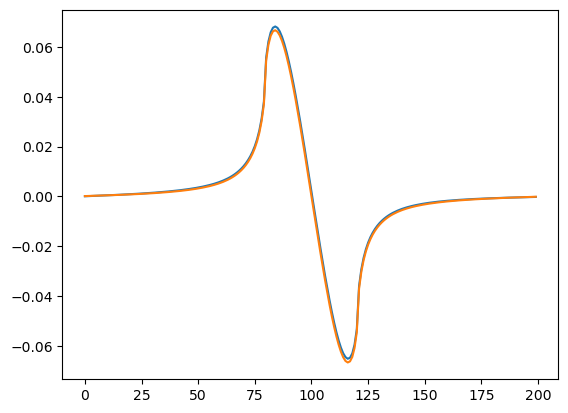

In [114]:
# for N = 300

conv = np.array(convergence)

plt.plot(np.imag(P1[0,:]))
plt.plot(np.imag(P[0,:]))

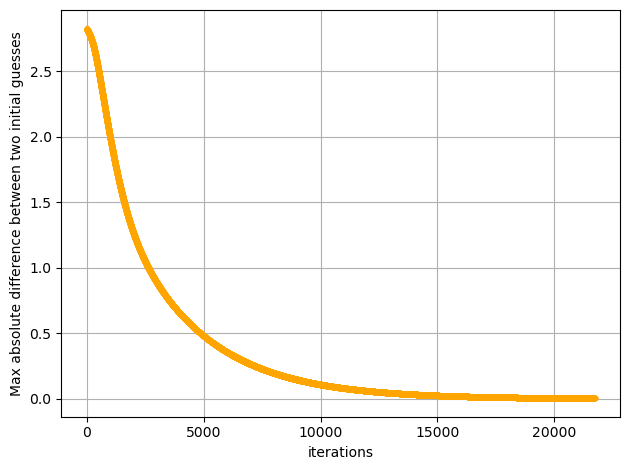

In [279]:
plt.plot(convergence, color='orange', linestyle=':', marker='o', markersize=3, label='Convergence')
plt.grid(True)
plt.xlabel("iterations")
plt.ylabel("Max absolute difference between two initial guesses")
plt.tight_layout()
plt.savefig('convergence_pitch.png', bbox_inches='tight')

In [283]:
ax = plt.axes(projection='3d')
plt.xlabel("x-axis")
plt.ylabel("y-axis")
ax.invert_yaxis()
ax.invert_xaxis()
ax.plot_surface(X, Y, np.imag(np.exp(om*1j*0.6)*P), cmap = 'bone_r')
plt.savefig('Pitching_d_1', bbox_inches='tight')

SyntaxError: invalid syntax (3109564925.py, line 6)

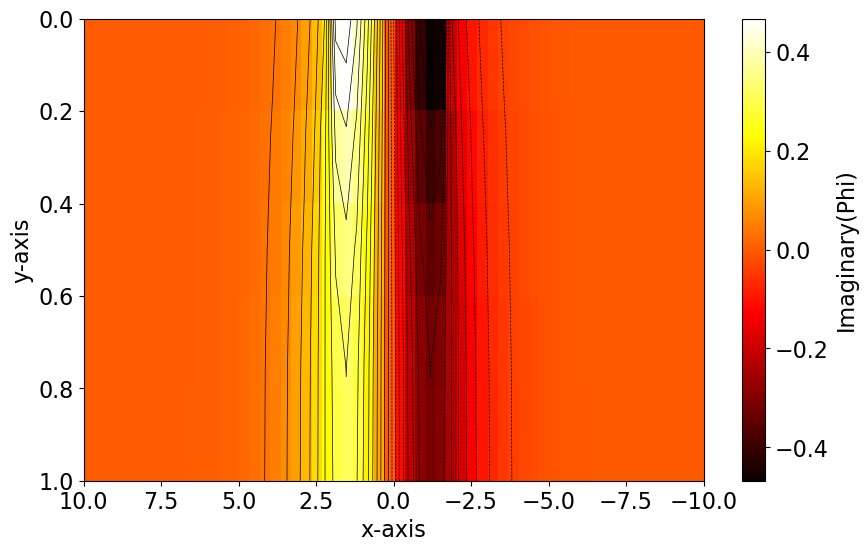

In [454]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting heatmap
heatmap = ax.imshow(np.imag(P), cmap='hot', extent=[np.min(X), np.max(X), np.min(Y), np.max(Y)], origin='lower')
contour_levels = 25  # You can adjust the number of contour levels as needed
contour = ax.contour(X, Y, np.imag(P), contour_levels, colors='black', linewidths=0.5)
ax.set_aspect('auto')

# Adding colorbar
cbar = plt.colorbar(heatmap)
cbar.set_label('Imaginary(Phi)', fontsize=16) 
cbar.ax.tick_params(labelsize=16)
plt.xlabel("x-axis", fontsize=16)
plt.ylabel("y-axis", fontsize=16)

ax.tick_params(axis='both', which='major', labelsize=16)
ax.invert_yaxis()
ax.invert_xaxis()

plt.savefig('heat_pitch.png', bbox_inches='tight')
plt.show()


# Checking that boundary conditions are satisfied

In [313]:
y_upper.shape

(159,)

In [385]:
np.savetxt('Phi_Data_Real.csv', np.real(P), delimiter=',',fmt='%f')
np.savetxt('Phi_Data_Imag.csv', np.imag(P), delimiter=',',fmt='%f')

In [316]:
y_raft_satisfied = 0*P.copy()
y_upper = 0*P.copy()
y_lower = 0*P.copy()
x_left = 0*P.copy()
x_right = 0*P.copy()
laplace_sat = 0*P.copy()



In [317]:



for i in range(0, M):
        for j in range(0, N):
            

            #y boundaries upper
            if i == 0:
                if j in range(delta, delta2+1):
                    a = i
                    b = j
                    y_raft_satisfied[a, b] = P[a, b] - y_raft_boundary(P, om, omg, k, dx, dy, a, b, middle, pitch, heav, x)
                    
                else:
                    a = i
                    b = j
                    y_upper[a, b] = P[a, b] - y_upper_boundary(P, om, omg, k, dx, dy, a, b, x)
                    
            #x boundaries
            elif j == 0:
                a = i
                b = j
                x_left[a, b] = P[a, b]  -x_left_boundary(P, om, omg, k, dx, dy, a, b)

            elif j == N-1:
                a = i
                b = j
                x_right[a, b] = P[a, b] - x_right_boundary(P, om, omg, k, dx, dy, a, b)
                
            #y-boundaries:
            elif i ==M-1:
                a = i
                b = j
                y_lower[a, b] = P[a, b] - y_lower_boundry(P, om, omg, k, dx, dy, a, b)



                
                
            #Laplace
            else:
                a = i
                b = j
                laplace_sat[a, b] = P[a, b]  - Laplace(P, om, omg, k, dx, dy, a, b)
                

In [318]:
Y_r = y_raft_satisfied[0,delta:delta2+1]
Y_up = np.concatenate((y_upper[0,:delta ], y_upper[0,delta2+1: ]))
Y_low = y_lower[M-1, :]
X_l = x_left[:, 0]
X_r = x_right[:, N-1]
Laplace_s = laplace_sat[1:M-1, 1:N-1]

In [338]:
a = np.max(np.absolute(Y_r) )
b = np.max(np.absolute(Y_up ))
c = np.max(np.absolute(Y_low))
d = np.max(np.absolute(X_l))
e = np.max(np.absolute(X_r))
f = np.max(np.absolute(Laplace_s))

1.2908159033894889e-08

In [337]:
b = np.max(np.absolute(Y_up ))
c = np.max(np.absolute(Y_low))
d = np.max(np.absolute(X_l))
e = np.max(np.absolute(X_r))
f = np.max(np.absolute(Laplace_s))

7.328865968673962e-09

In [336]:
c = np.max(np.absolute(Y_low))
d = np.max(np.absolute(X_l))
e = np.max(np.absolute(X_r))
f = np.max(np.absolute(Laplace_s))

0.0

In [335]:
d = np.max(np.absolute(X_l))
e = np.max(np.absolute(X_r))
f = np.max(np.absolute(Laplace_s))

1.2678129688015247e-09

In [334]:
e = np.max(np.absolute(X_r))
f = np.max(np.absolute(Laplace_s))

0.0

In [333]:
f = np.max(np.absolute(Laplace_s))

6.892695966424725e-09

In [340]:
a = np.max(np.absolute(Y_r) )
b = np.max(np.absolute(Y_up ))
c = np.max(np.absolute(Y_low))
d = np.max(np.absolute(X_l))
e = np.max(np.absolute(X_r))
f = np.max(np.absolute(Laplace_s))
values = [a, b, c, d, e, f]
categories = ["Raft", "Free surface", "Lower y", "X left", "X-right", "Laplace"]



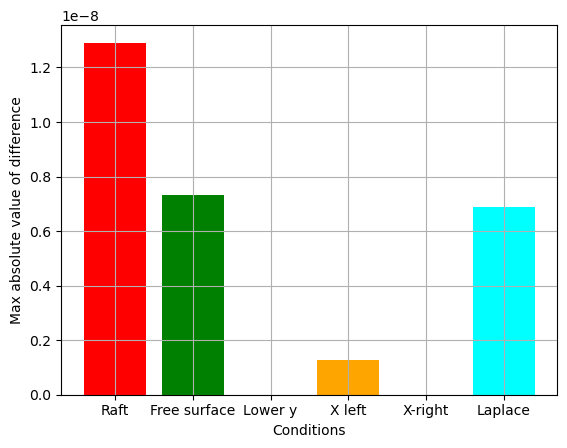

In [347]:
a = np.max(np.absolute(Y_r) )
b = np.max(np.absolute(Y_up ))
c = np.max(np.absolute(Y_low))
d = np.max(np.absolute(X_l))
e = np.max(np.absolute(X_r))
f = np.max(np.absolute(Laplace_s))
values = [a, b, c, d, e, f]
categories = ["Raft", "Free surface", "Lower y", "X left", "X-right", "Laplace"]



colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan']

# Create bar chart with specified colors
plt.bar(categories, values, color=colors)

# Add labels and title
plt.xlabel('Conditions')
plt.ylabel('Max absolute value of difference')
plt.grid(True)
# Show plot

plt.savefig('pitch_conditions.png', bbox_inches='tight')
plt.show()


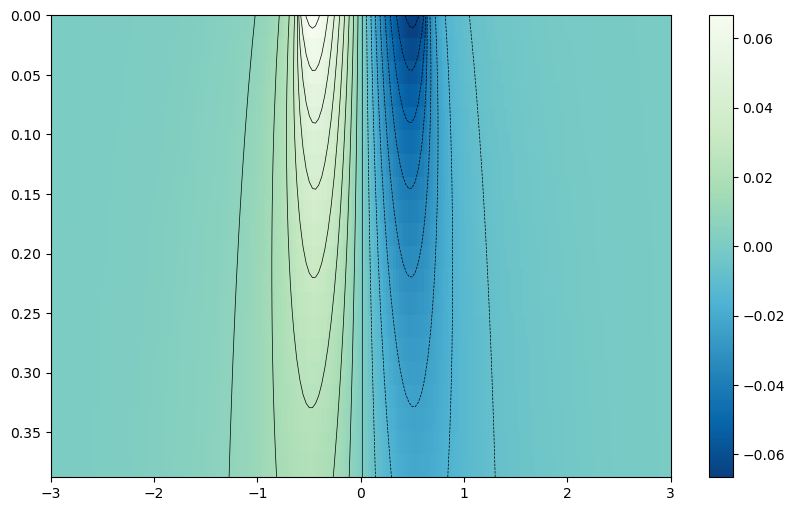

In [129]:
mask_y = (y <= 0.4) & (y >= 0)
filtered_P = np.imag(np.exp(om * 1j * 0) * P)[mask_y, :]

fig, ax = plt.subplots(figsize=(10, 6))


# Plotting heatmap with limited y-axis range
heatmap = ax.imshow(filtered_P, cmap='GnBu_r', extent=[np.min(X), np.max(X), np.min(Y[mask_y, :]), np.max(Y[mask_y, :])],
                    origin='lower')

# Adding contours
contour_levels = 20  # You can adjust the number of contour levels as needed
contour = ax.contour(X[mask_y, :], Y[mask_y, :], filtered_P, contour_levels, colors='black', linewidths=0.5)
ax.set_aspect('auto')  # Setting aspect ratio to 'auto'

# Adding colorbar
cbar = plt.colorbar(heatmap)

# Inverting the y-axis
ax.invert_yaxis()
plt.show()

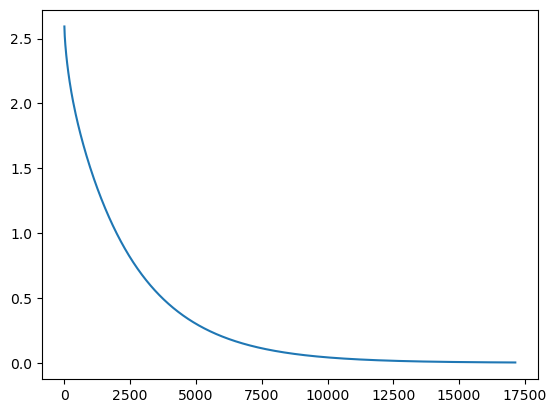

In [39]:
plt.plot(convergence)

# Heaving

In [87]:
N = 200
M = 100
L = 3
g = 9.81
k = 3
h = 1
g = 9.81
x1 = np.linspace(-L, L, N)
y1 = np.linspace(0, h, M)
dx1 = np.abs(x1[0] - x1[-1])/len(x1)
dy1 = np.abs(y1[0] - y1[-1])/len(y1)
X1, Y1 = np.meshgrid(x1, y1)
middle = int(N/2)
change = 20
delta = int(middle - change)
delta2 = int(middle + change)
pitch = 0
heav = .01
om = np.sqrt(k*g*np.tanh(k*h))
omg = (om**2)/9.8
#initialising P
P2 = (np.ones((M,N), dtype=complex)*np.sin(X1) + 1j*np.ones((M,N), dtype=complex)*np.sin(X1))

B =  np.ones((M,N), dtype=complex)*np.sin(X1) + 1j*np.ones((M,N), dtype=complex)*np.sin(X1)

P3 = (np.ones((M,N), dtype=complex) + 1j*np.ones((M,N), dtype=complex))
B1 = np.ones((M,N), dtype=complex) + 1j*np.ones((M,N), dtype=complex)
(1/( 1.5-omg*dy1))

U = 0.01
dy
(dy**2)*(1/(2*(dx**2) + 2*(dy**2)))

(1/( 1.5+omg*dy1))

0.6536451388846135

In [88]:
convergencea = []
conv_ima = []
conv_rea = []
convergencea = []
conv_im1a = []
conv_re1a = []

In [199]:
om

5.4115119329999155

In [93]:
iterations = 1000000
tolerance = 0.000001  # the tolerance


for t in range(iterations):
    P2_old = P2.copy()  # Create a copy of the current solution
    P3_old = P3.copy()
    #writing loop below:
    for i in range(0, M):
        for j in range(0, N):
            

            #y boundaries upper
            if i == 0:
                if j in range(delta, delta2+1):
                    a = i
                    b = j
                    P2[i, j] = y_raft_boundary(P2, om, omg, k, dx1, dy1, a, b, middle, pitch, heav, x1)
                    P3[i, j] = y_raft_boundary(P3, om, omg, k, dx1, dy1, a, b, middle, pitch, heav, x1)
                    
                else:
                    a = i
                    b = j
                    P2[i, j] = y_upper_boundary(P2, om, omg, k, dx1, dy1, a, b, x1)
                    P3[i, j] = y_upper_boundary(P3, om, omg, k, dx1, dy1, a, b, x1)
            #x boundaries
            elif j == 0:
                a = i
                b = j
                P2[i, j] = x_left_boundary(P2, om, omg, k, dx1, dy1, a, b)
                P3[i, j] = x_left_boundary(P3, om, omg, k, dx1, dy1, a, b)
            elif j == N-1:
                a = i
                b = j
                P2[i, j] = x_right_boundary(P2, om, omg, k, dx1, dy1, a, b)
                P3[i, j] = x_right_boundary(P3, om, omg, k, dx1, dy1, a, b)
                
            #y-boundaries:
            elif i ==M-1:
                a = i
                b = j
                P2[i, j] = y_lower_boundry(P2, om, omg, k, dx1, dy1, a, b)
                P3[i, j] = y_lower_boundry(P3, om, omg, k, dx1, dy1, a, b)


                
                
            #Laplace
            else:
                a = i
                b = j
                P2[i, j] = Laplace(P2, om, omg, k, dx1, dy1, a, b)
                P3[i, j] = Laplace(P3, om, omg, k, dx1, dy1, a, b)
                
            
                

                
                
    

    # Check for convergence
    di = np.max(np.abs(P2 - P2_old))
    di1 = np.max(np.abs(P3 - P3_old))

    di2 = np.max(np.abs(P2 - P3))
    di3 = np.max(np.abs(np.imag(P2) - np.imag(P2_old)))
    di4 = np.max(np.abs(np.real(P2) - np.real(P2_old)))

    di5 =np.max(np.abs(np.imag(P3) - np.imag(P3_old)))
    di6 = np.max(np.abs(np.real(P3) - np.real(P3_old)))
    conv_ima.append(di3)
    convergencea.append(di2)
    conv_rea.append(di4)
    conv_im1a.append(di5)
    conv_re1a.append(di6)
    if (di < tolerance) and (di1 < tolerance):
        print(f"Converged after {t+1} iterations.")
        break
    if t%50 ==0:
        print(di1, di2, t+1)

1.49383452756858e-06 0.012453194406593683 1
1.2160871821923184e-06 0.012393312890364435 51
1.2104775198864932e-06 0.012333711880248512 101
1.2048584077355792e-06 0.012274385896859913 151
1.1991633297854557e-06 0.012215337932506495 201
1.1934265170666982e-06 0.012156570943193798 251
1.1876802063881154e-06 0.012098086115753314 301
1.1819435384182336e-06 0.012039883390904534 351
1.176226760717509e-06 0.01198196201123234 401
1.1705351368470544e-06 0.01192432085320618 451
1.1648712597175854e-06 0.011866958608483883 501
1.1592363039096242e-06 0.011809873880532503 551
1.15363069210279e-06 0.011753065235900195 601
1.148054451217046e-06 0.011696531231330513 651
1.1425074046294378e-06 0.011640270427910637 701
1.1369892768061555e-06 0.01158428139819172 751
1.1314997504336837e-06 0.011528562729475163 801
1.12603849743338e-06 0.011473113025010168 851
1.1206051952375625e-06 0.011417930904070174 901
1.1151995350173795e-06 0.011363015001451262 951
1.1098212250703202e-06 0.011308363966698756 1001
1.104

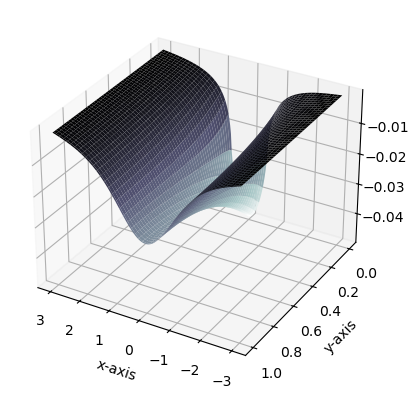

In [353]:
ax = plt.axes(projection='3d')
plt.xlabel("x-axis")
plt.ylabel("y-axis")
ax.invert_yaxis()
ax.invert_xaxis()
ax.plot_surface(X1, Y1, np.imag(np.exp(om*1j*0)*P2), cmap = 'bone_r')
plt.savefig('it_heaving', bbox_inches='tight')

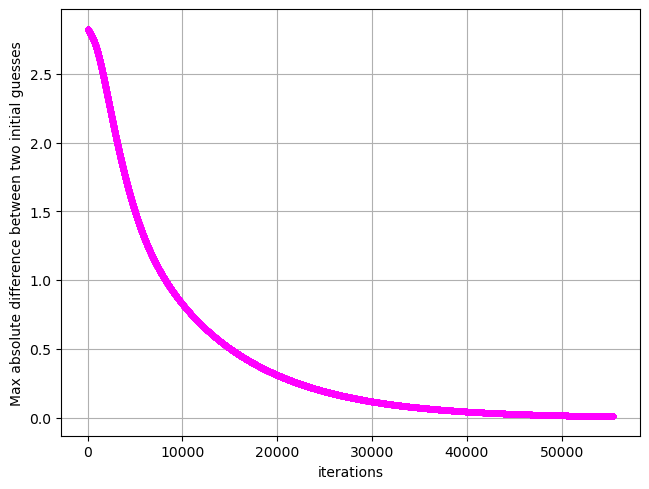

In [348]:
plt.plot(convergencea, color='magenta', linestyle=':', marker='o', markersize=3, label='Convergence')
plt.grid(True)
plt.tight_layout()
plt.xlabel("iterations")
plt.ylabel("Max absolute difference between two initial guesses")
plt.savefig('convergence_heave.png', bbox_inches='tight')

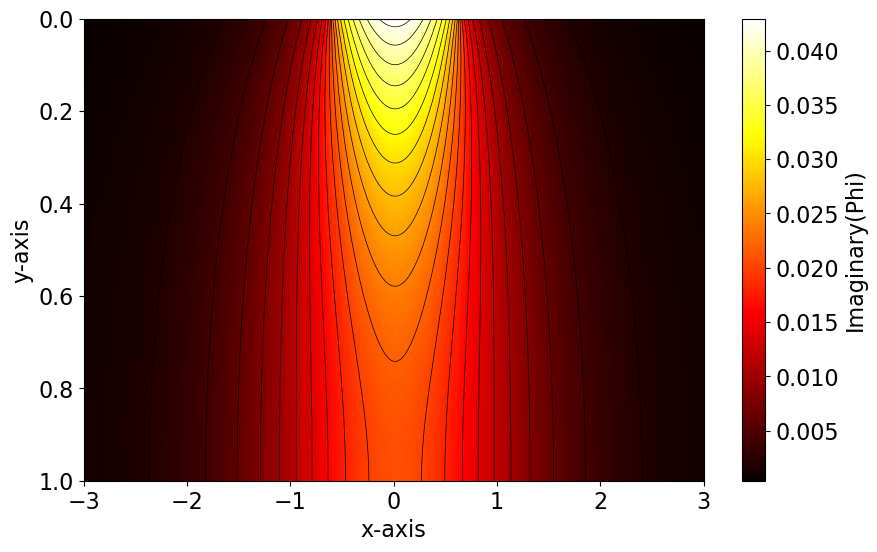

In [372]:

fig, ax = plt.subplots(figsize=(10, 6))
plt.xlabel("x-axis")
plt.ylabel("y-axis")

# Plotting heatmap
heatmap = ax.imshow(np.imag(-P3), cmap='hot', extent=[np.min(X1), np.max(X1), np.min(Y1), np.max(Y1)], origin='lower')

# Adding contours
contour_levels = 25  # You can adjust the number of contour levels as needed
contour = ax.contour(X1, Y1, np.imag(-P3), contour_levels, colors='black', linewidths=0.5)
ax.set_aspect('auto')
# Adding colorbar
cbar = plt.colorbar(heatmap)
cbar.set_label('Imaginary(Phi)', fontsize=16) 
cbar.ax.tick_params(labelsize=16)
plt.xlabel("x-axis", fontsize=16)
plt.ylabel("y-axis", fontsize=16)

ax.tick_params(axis='both', which='major', labelsize=16)
ax.invert_yaxis()
plt.savefig('it_heaving.png', bbox_inches='tight')
plt.show()

In [357]:
y_raft_satisfied = 0*P3.copy()
y_upper = 0*P3.copy()
y_lower = 0*P3.copy()
x_left = 0*P3.copy()
x_right = 0*P3.copy()
laplace_sat = 0*P3.copy()

for i in range(0, M):
        for j in range(0, N):
            #y boundaries upper
            if i == 0:
                if j in range(delta, delta2+1):
                    a = i
                    b = j
                    y_raft_satisfied[a, b] = P3[a, b] - y_raft_boundary(P3, om, omg, k, dx, dy, a, b, middle, pitch, heav, x)
                else:
                    a = i
                    b = j
                    y_upper[a, b] = P3[a, b] - y_upper_boundary(P3, om, omg, k, dx, dy, a, b, x)
                    
            #x boundaries
            elif j == 0:
                a = i
                b = j
                x_left[a, b] = P3[a, b]  -x_left_boundary(P3, om, omg, k, dx, dy, a, b)

            elif j == N-1:
                a = i
                b = j
                x_right[a, b] = P3[a, b] - x_right_boundary(P3, om, omg, k, dx, dy, a, b)
                
            #y-boundaries:
            elif i ==M-1:
                a = i
                b = j
                y_lower[a, b] = P3[a, b] - y_lower_boundry(P3, om, omg, k, dx, dy, a, b)

            #Laplace
            else:
                a = i
                b = j
                laplace_sat[a, b] = P3[a, b]  - Laplace(P3, om, omg, k, dx, dy, a, b)

In [363]:



Y_r = y_raft_satisfied[0,delta:delta2+1]
Y_up = np.concatenate((y_upper[0,:delta ], y_upper[0,delta2+1: ]))
Y_low = y_lower[M-1, :]
X_l = x_left[:, 0]
X_r = x_right[:, N-1]
Laplace_s = laplace_sat[1:M-1, 1:N-1]

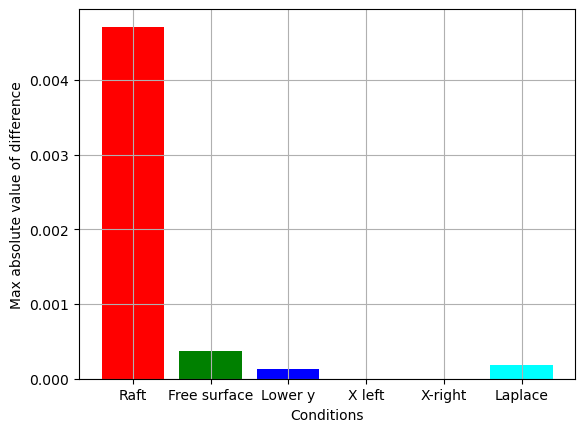

In [364]:






a = np.max(np.absolute(Y_r) )
b = np.max(np.absolute(Y_up ))
c = np.max(np.absolute(Y_low))
d = np.max(np.absolute(X_l))
e = np.max(np.absolute(X_r))
f = np.max(np.absolute(Laplace_s))
values = [a, b, c, d, e, f]
categories = ["Raft", "Free surface", "Lower y", "X left", "X-right", "Laplace"]



colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan']

# Create bar chart with specified colors
plt.bar(categories, values, color=colors)

# Add labels and title
plt.xlabel('Conditions')
plt.ylabel('Max absolute value of difference')
plt.grid(True)
# Show plot

plt.savefig('heave_conditions.png', bbox_inches='tight')
plt.show()


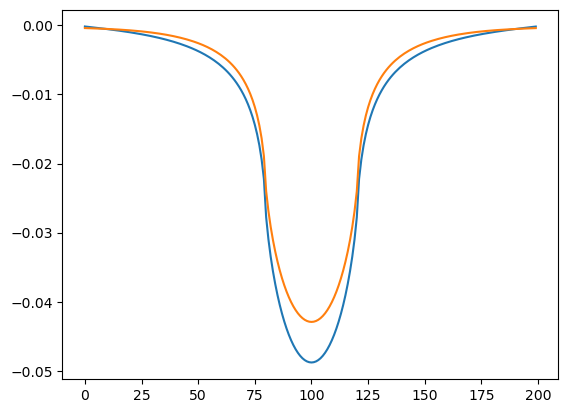

In [99]:
# for N = 300

conv = np.array(convergence)

plt.plot(np.imag(P2[0,:]))
plt.plot(np.imag(P3[0,:]))

In [96]:
mask_y = (y >= 0) & (y <= 0.2)  
filtered_P = np.imag(np.exp(om * 1j * 0) * P3)[mask_y, :]

fig, ax = plt.subplots(figsize=(10, 6))
plt.title("Oscillating Object FD:")
plt.xlabel("x-axis")
plt.ylabel("y-axis")

# Plotting heatmap with limited y-axis range
heatmap = ax.imshow(filtered_P, cmap='GnBu_r', extent=[np.min(X1), np.max(X1), np.min(Y1[mask_y, :]), np.max(Y1[mask_y, :])],
                    origin='lower')

# Adding contours
contour_levels = 20  # You can adjust the number of contour levels as needed
contour = ax.contour(X1[mask_y, :], Y1[mask_y, :], filtered_P, contour_levels, colors='black', linewidths=0.5)
ax.set_aspect('auto')  # Setting aspect ratio to 'auto'

# Adding colorbar
cbar = plt.colorbar(heatmap)

# Inverting the y-axis
ax.invert_yaxis()

plt.show()

IndexError: boolean index did not match indexed array along dimension 0; dimension is 100 but corresponding boolean dimension is 20

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (20, 200) and arg 2 with shape (100, 200).

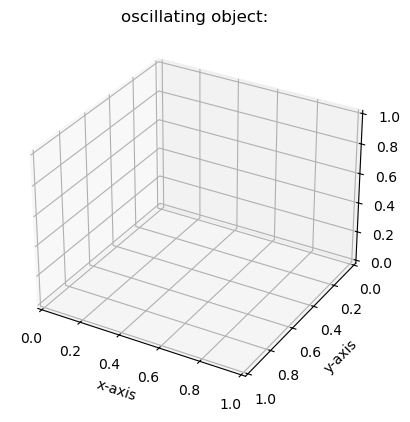

In [92]:
ax = plt.axes(projection='3d')
plt.title("oscillating object:")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
ax.invert_yaxis()
ax.plot_surface(X, Y, np.real(P2), cmap = 'bone_r')

# Pitching and Heaving

In [105]:
N = 200
M = 50
L = 3
g = 9.81
k = 10
h = 1
g = 9.81
x2 = np.linspace(-L, L, N)
y2 = np.linspace(0, h, M)
dx2 = np.abs(x2[0] - x2[-1])/len(x2)
dy2 = np.abs(y2[0] - y2[-1])/len(y2)
X2, Y2 = np.meshgrid(x2, y2)
middle = int(N/2)
change = 20
delta = int(middle - change)
delta2 = int(middle + change)
pitch = 0.1
heav = .01
om = np.sqrt(k*g*np.tanh(k*h))
omg = (om**2)/9.8
#initialising P
P4 = (np.ones((M,N), dtype=complex)*np.sin(X2) + 1j*np.ones((M,N), dtype=complex)*np.sin(Y2))

B =  np.ones((M,N), dtype=complex)*np.sin(X2) + 1j*np.ones((M,N), dtype=complex)*np.sin(X2)

P5 = (np.ones((M,N), dtype=complex) + 1j*np.ones((M,N), dtype=complex))
B1 = np.ones((M,N), dtype=complex) + 1j*np.ones((M,N), dtype=complex)
(1/( 1.5-omg*dy1))

U = 0.01
dy
(dy**2)*(1/(2*(dx**2) + 2*(dy**2)))

(1/( 1.5+omg*dy2))

0.5881646863976147

In [106]:
convergenceb = []
conv_imb = []
conv_reb = []
convergenceb = []
conv_im1b = []
conv_re1b = []

In [107]:
iterations = 1000000
tolerance = 0.000001  # the tolerance
conv_imb = []
convergenceb = []
conv_reb = []
conv_im1b = []
conv_re1b = []

for t in range(iterations):
    P4_old = P4.copy()  # Create a copy of the current solution
    P5_old = P5.copy()
    #writing loop below:
    for i in range(0, M):
        for j in range(0, N):
            # y boundaries upper
            if i == 0:
                if j in range(delta, delta2+1):
                    a = i
                    b = j
                    P4[i, j] = y_raft_boundary(P4, om, omg, k, dx2, dy2, a, b, middle, pitch, heav, x2)
                    P5[i, j] = y_raft_boundary(P5, om, omg, k, dx2, dy2, a, b, middle, pitch, heav, x2)
                    
                else:
                    a = i
                    b = j
                    P4[i, j] = y_upper_boundary(P4, om, omg, k, dx2, dy2, a, b, x2)
                    P5[i, j] = y_upper_boundary(P5, om, omg, k, dx2, dy2, a, b, x2)
            # x boundaries
            elif j == 0:
                a = i
                b = j
                P4[i, j] = x_left_boundary(P4, om, omg, k, dx2, dy2, a, b)
                P5[i, j] = x_left_boundary(P5, om, omg, k, dx2, dy2, a, b)
            elif j == N-1:
                a = i
                b = j
                P4[i, j] = x_right_boundary(P4, om, omg, k, dx2, dy2, a, b)
                P5[i, j] = x_right_boundary(P5, om, omg, k, dx2, dy2, a, b)
                
            # y-boundaries:
            elif i == M-1:
                a = i
                b = j
                P4[i, j] = y_lower_boundry(P4, om, omg, k, dx2, dy2, a, b)
                P5[i, j] = y_lower_boundry(P5, om, omg, k, dx2, dy2, a, b)

            # Laplace
            else:
                a = i
                b = j
                P4[i, j] = Laplace(P4, om, omg, k, dx2, dy2, a, b)
                P5[i, j] = Laplace(P5, om, omg, k, dx2, dy2, a, b)
    
    # Check for convergence
    d = np.max(np.abs(P4 - P4_old))
    d1 = np.max(np.abs(P5 - P5_old))

    d2 = np.max(np.abs(P4 - P5))
    d3 = np.max(np.abs(np.imag(P4) - np.imag(P4_old)))
    d4 = np.max(np.abs(np.real(P4) - np.real(P4_old)))

    d5 = np.max(np.abs(np.imag(P5) - np.imag(P5_old)))
    d6 = np.max(np.abs(np.real(P5) - np.real(P5_old)))
    conv_imb.append(d3)
    convergenceb.append(d2)
    conv_reb.append(d4)
    conv_im1b.append(d5)
    conv_re1b.append(d6)
    if (d < tolerance) and (d1 < tolerance):
        print(f"Converged after {t+1} iterations.")
        break
    if t % 50 == 0:
        print(d1, d2, t+1)

0.2852816077098299 2.1929966807123558 1
0.011738825276769208 2.0537980693719278 51
0.005917217816866837 2.0050705239761974 101
0.0038282053140779354 1.980808521616553 151
0.0027972519766307946 1.9644520941089494 201
0.002193911222776362 1.9408422091618116 251
0.0018038507996901722 1.909874100298186 301
0.0015368245492408013 1.8725775835934413 351
0.0013471470422366546 1.8301624649943395 401
0.0012106296895908085 1.7839178404452647 451
0.0011122331226395643 1.7353647642952914 501
0.0010428815312095716 1.6852397486149435 551
0.0009873103899976407 1.6346805139067189 601
0.0009369682065771415 1.5841863863980754 651
0.0008911368660683695 1.5342672490967715 701
0.000848552281783107 1.4853337263626807 751
0.0008085912478907721 1.437696591402209 801
0.0007713539761175854 1.3915498091928376 851
0.0007361516216481479 1.3469916345426813 901
0.0007028624460723879 1.3041549691027179 951
0.0006713762733112855 1.2630817432089139 1001
0.0006415925592311855 1.2237749980620796 1051
0.0006134190229179559

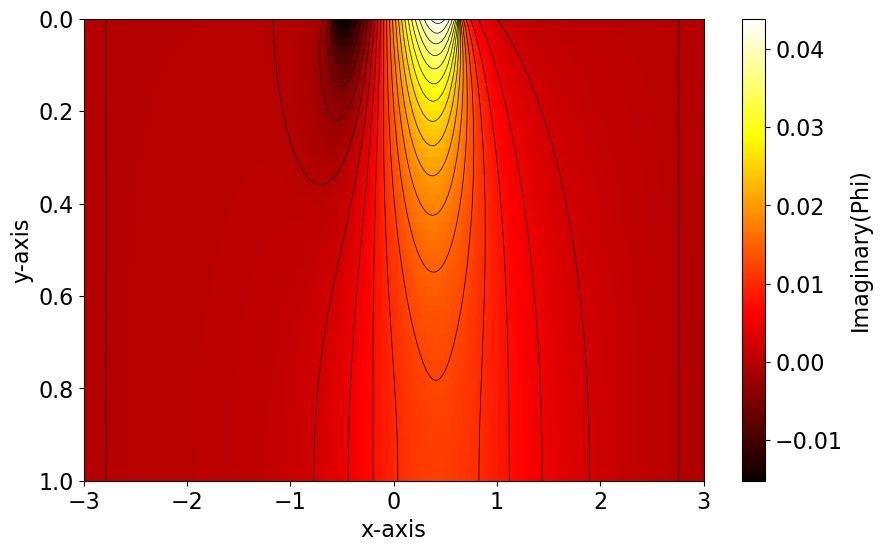

In [380]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.xlabel("x-axis")
plt.ylabel("y-axis")

# Plotting heatmap
heatmap = ax.imshow(np.imag(np.exp(om*1j*1.5)*P4), cmap='hot', extent=[np.min(X2), np.max(X2), np.min(Y2), np.max(Y2)], origin='lower')

# Adding contours
contour_levels = 25  # You can adjust the number of contour levels as needed
contour = ax.contour(X2, Y2, np.imag(np.exp(om*1j*1.5)*P4), contour_levels, colors='black', linewidths=0.5)
ax.set_aspect('auto')
# Adding colorbar
cbar = plt.colorbar(heatmap)
cbar.set_label('Imaginary(Phi)', fontsize=16) 
cbar.ax.tick_params(labelsize=16)
plt.xlabel("x-axis", fontsize=16)
plt.ylabel("y-axis", fontsize=16)

ax.tick_params(axis='both', which='major', labelsize=16)
ax.invert_yaxis()

plt.savefig('HP_heat15', bbox_inches='tight')
plt.show()

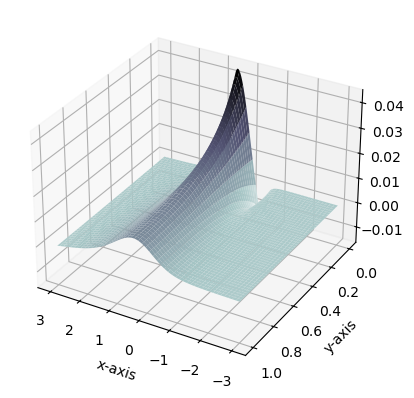

In [267]:
ax = plt.axes(projection='3d')
plt.xlabel("x-axis")
plt.ylabel("y-axis")
ax.invert_yaxis()
ax.invert_xaxis()
ax.plot_surface(X2, Y2, np.imag(np.exp(om*1j*1.5)*P4), cmap = 'bone_r')
plt.savefig('h_15', bbox_inches='tight')

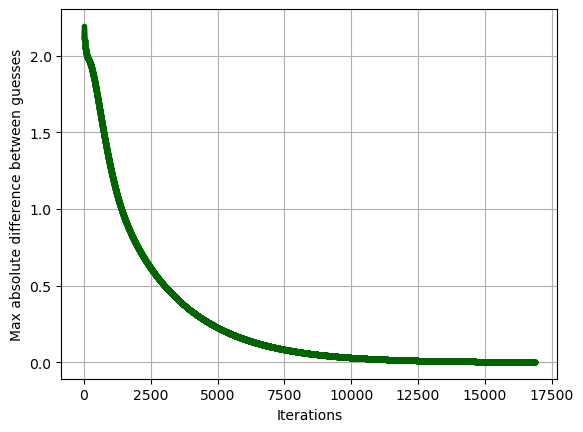

In [366]:
plt.plot(convergenceb, color='darkgreen', linestyle=':', marker='o', markersize=3, label='Convergence')
plt.grid(True)
plt.tight_layout
plt.xlabel("Iterations")
plt.ylabel("Max absolute difference between guesses")
plt.savefig('convergence_HP', bbox_inches='tight')

# Checking conditions:

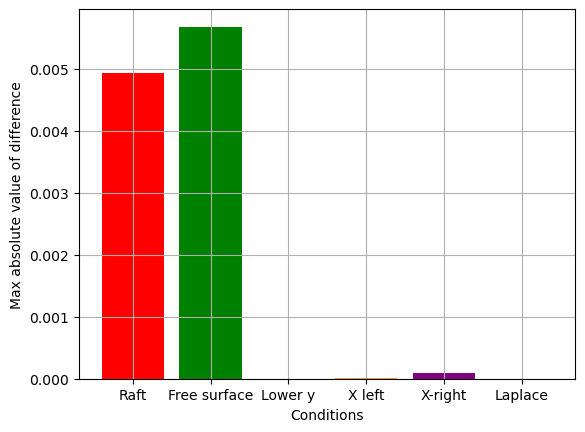

In [382]:
y_raft_satisfied = 0 * P4.copy()
y_upper = 0 * P4.copy()
y_lower = 0 * P4.copy()
x_left = 0 * P4.copy()
x_right = 0 * P4.copy()
laplace_sat = 0 * P4.copy()

# Iterate through the arrays
for i in range(0, M):
    for j in range(0, N):
        # y boundaries upper
        if i == 0:
            if j in range(delta, delta2 + 1):
                a = i
                b = j
                y_raft_satisfied[a, b] = P4[a, b] - y_raft_boundary(P4, om, omg, k, dx, dy, a, b, middle, pitch, heav,
                                                                   x)
            else:
                a = i
                b = j
                y_upper[a, b] = P4[a, b] - y_upper_boundary(P4, om, omg, k, dx, dy, a, b, x)

        # x boundaries
        elif j == 0:
            a = i
            b = j
            x_left[a, b] = P4[a, b] - x_left_boundary(P4, om, omg, k, dx, dy, a, b)

        elif j == N - 1:
            a = i
            b = j
            x_right[a, b] = P4[a, b] - x_right_boundary(P4, om, omg, k, dx, dy, a, b)

        # y-boundaries:
        elif i == M - 1:
            a = i
            b = j
            y_lower[a, b] = P4[a, b] - y_lower_boundry(P4, om, omg, k, dx, dy, a, b)

        # Laplace
        else:
            a = i
            b = j
            laplace_sat[a, b] = P4[a, b] - Laplace(P4, om, omg, k, dx, dy, a, b)

# Extract values from arrays
Y_r = y_raft_satisfied[0, delta:delta2 + 1]
Y_up = np.concatenate((y_upper[0, :delta], y_upper[0, delta2 + 1:]))
Y_low = y_lower[M - 1, :]
X_l = x_left[:, 0]
X_r = x_right[:, N - 1]
Laplace_s = laplace_sat[1:M - 1, 1:N - 1]

# Calculate maximum absolute values
a = np.max(np.absolute(Y_r))
b = np.max(np.absolute(Y_up))
c = np.max(np.absolute(Y_low))
d = np.max(np.absolute(X_l))
e = np.max(np.absolute(X_r))
f = np.max(np.absolute(Laplace_s))

# Values and categories for the bar chart
values = [a, b, c, d, e, f]
categories = ["Raft", "Free surface", "Lower y", "X left", "X-right", "Laplace"]

# Define colors for each bar
colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan']

# Create bar chart with specified colors
plt.bar(categories, values, color=colors)

# Add labels and title
plt.xlabel('Conditions')
plt.ylabel('Max absolute value of difference')
plt.grid(True)

# Save and show the plot
plt.savefig('HP_conditions.png', bbox_inches='tight')
plt.show()